In [1]:
#!/usr/bin/env python3
"""
Script for testing the SNNNumpy class with sample data
"""
# Standard libraries
import matplotlib.pyplot as plt
import numpy as np
# Local libraries
import spikingFT.startup
import spikingFT.utils.plotter


def main(conf_filename="../config/experiment_special_cases.json"):
    # Instantiate a simulation handler and run spiking FT with sample data
    sim_handler = spikingFT.startup.startup(conf_filename)
    nsamples = sim_handler.snn.nsamples
    nlayers = sim_handler.snn.nlayers
    sim_time = sim_handler.config["snn_config"]["sim_time"]
    time_step = sim_handler.config["snn_config"]["time_step"]
    total_time = sim_time * (nlayers+1)
    real_spikes = sim_handler.snn.spikes[:, 0][1:int(nsamples), :]
    imag_spikes = sim_handler.snn.spikes[:, 1][1:int(nsamples), :]
    output = sim_handler.snn.output

    # Split input spikes in two subgroups,
    # so it has the same format as an SNN layer
    input_spikes = sim_handler.encoded_data.real
    input_spikes_1 = input_spikes[0, :int(nsamples/2)]
    input_spikes_2 = input_spikes[0, int(nsamples/2):]

    # Plot S-FT result and reference result
    kwargs = {}
    kwargs["plot_names"] = ["spikes"]
    kwargs["data"] = [(input_spikes_1, input_spikes_2, total_time)]
    for n in range(nlayers):
        kwargs["plot_names"].append("voltages")
        kwargs["plot_names"].append("spikes")
        kwargs["data"].append(sim_handler.snn.voltage[:, :, :, n])
        kwargs["data"].append(
            (real_spikes[:, n], imag_spikes[:, n], total_time)
        )
    kwargs["sim_time"] = sim_time
    kwargs["tight_layout"] = False
    kwargs["nlayers"] = nlayers
    kwargs["time_step"] = time_step
    kwargs["figsize"] = (6, 7)
    sim_plotter = spikingFT.utils.plotter.SNNLayersPlotter(**kwargs)
    fig = sim_plotter()
    #fig.savefig("./simulation_plot.pdf", dpi=150, bbox_inches='tight')
    plt.show()
    
    simplified_output = spikingFT.utils.metrics.simplify_ft(output)
    sft_real = simplified_output[:, 0]
    sft_imag = simplified_output[:, 1]
    sft_modulus = np.sqrt(real_spikes**2 + imag_spikes**2)
    sft_modulus -= sft_modulus.min()
    sft_modulus /= sft_modulus.max()
    ft_real, ft_imag, ft_modulus = get_ft_components(nsamples, data)

    real_error = rel_error[:, 0]
    imag_error = rel_error[:, 1]
    abs_error = (real_error + imag_error) / 2
    kwargs = {}
    kwargs["plot_names"] = ["real_spectrum", "imag_spectrum", "modulus"]
    kwargs["data"] = [
        (sft_real, ft_real, real_error),
        (sft_imag, ft_imag, imag_error),
        (sft_modulus, ft_modulus, abs_error)
    ]
    error_plotter = spikingFT.utils.plotter.RelErrorPlotter(**kwargs)
    fig = error_plotter()
    plt.show()
    return

Brian2 cannot be found. It will not be possible to run simulation with Brian2.


INFO: Starting up spiking-FT:
- Configuration file: ../config/experiment_special_cases.json
- Simulation time: 127
- Time step: 1
- FT mode: fft
- Framework: radix4loihi
- Test performance: False
INFO: Loading data
INFO: Data loaded:
- Source: TI_sensor_special
- Nº frames: 1
- Nº chirps: 4
- Nº samples: 256
- Nº antennas: 1
INFO: Encoding data to spikes
INFO: Initializing SNN simulation
DEBUG: Creating Compartments ...
DEBUG: Creating CompartmentPrototypes of Layer 0 ...
DEBUG: Creating CompartmentPrototypes of Layer 1 ...
DEBUG: Creating CompartmentPrototypes of Layer 2 ...
DEBUG: Creating CompartmentPrototypes of Layer 3 ...
DEBUG: Done.
DEBUG: Creating ConnectionPrototype ...
DEBUG: Creating auxillary neurons ...
DEBUG: Clock neuron connected to layer 0.
DEBUG: Reset neuron connected to layer 0.
DEBUG: Clock neuron connected to layer 1.
DEBUG: Reset neuron connected to layer 1.
DEBUG: Clock neuron connected to layer 2.
DEBUG: Reset neuron connected to layer 2.
DEBUG: Clock neuron c

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.108:41251
INFO:DRV:      Host server up..............Done 0.22s
INFO:DRV:      Encoding axons/synapses.....Done 1.96s
INFO:DRV:      Compiling Embedded snips....Done 0.33s
INFO:DRV:      Compiling MPDS Registers....Done 2.05ms
INFO:HST:  Args chip=0 cpu=0 /homes/nreeb/loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1633367144.1156604/launcher_chip0_lmt0.bin --chips=1 --epoch=0 --remote-relay=1 
INFO:HST:  Nx...
INFO:DRV:      Booting up..................Done 0.70s
INFO:DRV:      Encoding probes.............Done 5.17ms
INFO:DRV:      Transferring probes.........Done 0.05s
INFO:DRV:      Configuring registers.......Done 0.97s
INFO:DRV:      Transferring spikes.........Done 0.07s
INFO:DRV:      Executing...................Done 17.12s
INFO:DRV:      Processing timeseries.......Done 10.39s
INFO:DRV:  Executor: 762 timesteps.........Done 31.87s


INFO: Finishing Loihi execution. Disconnecting board ...


INFO:HST:  chip=0 cpu=0 halted, status=0x0


DEBUG: Done.
DEBUG: Run finished.
DEBUG: Resulting RMSE: 0.12653203716592243
INFO: Execution finished


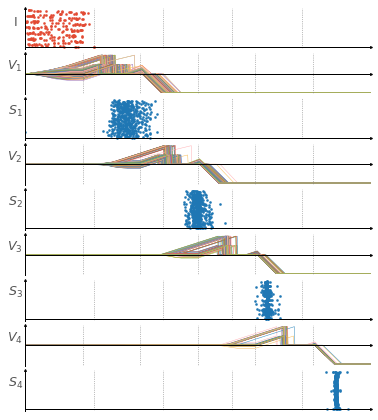

NameError: name 'get_ft_components' is not defined

In [2]:
main()